In [0]:
%%bash
mkdir -p /content/app
cd /content/app
git clone https://github.com/pjreddie/darknet
cd /content/app/darknet
make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

Cloning into 'darknet'...


In [0]:
%%bash
cd /content/app/darknet
wget -q https://pjreddie.com/media/files/yolov3.weights


In [0]:
%%bash
cd /content/app/darknet
wget https://www.dognosticscareercenter.com/resources/Pictures/Boarding%20dog.jpg -O test.jpg
./darknet detect cfg/yolov3.cfg yolov3.weights test.jpg

test.jpg: Predicted in 20.254302 seconds.
dog: 100%
dog: 100%
dog: 99%


--2019-05-31 07:48:13--  https://www.dognosticscareercenter.com/resources/Pictures/Boarding%20dog.jpg
Resolving www.dognosticscareercenter.com (www.dognosticscareercenter.com)... 34.226.77.200
Connecting to www.dognosticscareercenter.com (www.dognosticscareercenter.com)|34.226.77.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147674 (144K) [image/jpeg]
Saving to: ‘test.jpg’

     0K .......... .......... .......... .......... .......... 34%  754K 0s
    50K .......... .......... .......... .......... .......... 69%  607K 0s
   100K .......... .......... .......... .......... ....      100%  191M=0.1s

Last-modified header invalid -- time-stamp ignored.
2019-05-31 07:48:13 (968 KB/s) - ‘test.jpg’ saved [147674/147674]

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 

In [0]:
% ls -la /content/app/darknet

total 244648
drwxr-xr-x 13 root root      4096 May 31 07:48 ./
drwxr-xr-x  3 root root      4096 May 31 07:47 ../
drwxr-xr-x  2 root root      4096 May 31 07:47 backup/
drwxr-xr-x  2 root root      4096 May 31 07:47 cfg/
-rwxr-xr-x  1 root root    730568 May 31 07:48 darknet*
drwxr-xr-x  3 root root      4096 May 31 07:47 data/
drwxr-xr-x  2 root root      4096 May 31 07:47 examples/
drwxr-xr-x  8 root root      4096 May 31 07:47 .git/
-rw-r--r--  1 root root       200 May 31 07:47 .gitignore
drwxr-xr-x  2 root root      4096 May 31 07:47 include/
-rw-r--r--  1 root root    832782 May 31 07:48 libdarknet.a
-rwxr-xr-x  1 root root    622776 May 31 07:48 libdarknet.so*
-rw-r--r--  1 root root       515 May 31 07:47 LICENSE
-rw-r--r--  1 root root       474 May 31 07:47 LICENSE.fuck
-rw-r--r--  1 root root      6652 May 31 07:47 LICENSE.gen
-rw-r--r--  1 root root     35141 May 31 07:47 LICENSE.gpl
-rw-r--r--  1 root root       360 May 31 07:47 LICENSE.meta
-rw-r--r--  1 root root      10

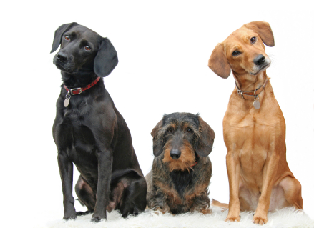

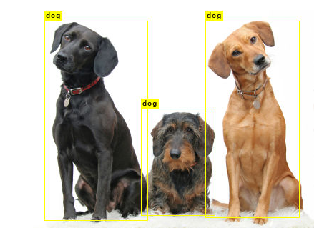

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # Python Image Library

# もとの入力画像を src に読み込む
src = Image.open('/content/app/darknet/test.jpg')
# YOLOが出力した結果を読み込む
result = Image.open('/content/app/darknet/predictions.jpg')

plt.axis('off')
plt.imshow(np.asarray(src)) # srcはPILの画像形式で表示できないので変換
plt.show()

plt.axis('off')
plt.imshow(np.asarray(result)) # srcはPILの画像形式で表示できないので変換
plt.show()